In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
wnba = pd.read_csv('wnba.csv')
parameter=wnba['Games Played'].max()
sample=wnba['Games Played'].sample(30,random_state=1)
statistic=sample.max()
sampling_error=parameter-statistic

In statistical terms, we want our samples to be representative of their corresponding populations. If a sample is representative, then the sampling error is low. The more representative a sample is, the smaller the sampling error. The less representative a sample is, the greater the sampling error.

## Random sampling

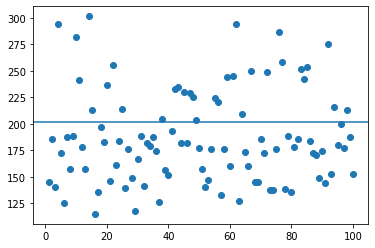

In [6]:
sample_means=[]
population_mean=wnba['PTS'].mean()

for i in range(0,100):
    sample=wnba['PTS'].sample(10,random_state=i)
    sample_means.append(sample.mean())

plt.scatter(x=range(1,101), y=sample_means)
plt.axhline(population_mean)

A pseudorandom number generator uses an initial value to generate a sequence of numbers that has properties similar to those of a sequence that is truly random. With random_state we specify that initial value used by the pseudorandom number generator.

If we want to generate a sequence of five numbers using a pseudorandom generator, and begin from an initial value of 1, we'll get the same five numbers no matter how many times we run the code. If we ran wnba['Games Played'].sample(5, random_state = 1) we'd get the same sample every time we run the code.

This problem can be solved by increasing the sample size. As we increase the sample size, the sample means vary less around the population mean, and the chances of getting an unrepresentative sample decrease.

We can easily see how sample means tend to vary less and less around the population mean as we increase the sample size. From this observation we can make two conclusions:

Simple random sampling is not a reliable sampling method when the sample size is small. Because sample means vary a lot around the population mean, there's a good chance we'll get an unrepresentative sample.
* When we do simple random sampling, we should try to get a sample that is as large as possible. 
* A large sample decreases the variability of the sampling process, which in turn decreases the chances that we'll get an unrepresentative sample.

The metrics of a player (number of points, number of assists, etc.) depend on their position, and we might want to analyze the patterns for each individual position. If we perform simple random sampling, there's a chance that some categories won't be included in our sample

## Stratified sampling

In [7]:
print(wnba['Pos'].unique())

['F' 'G/F' 'G' 'C' 'F/C']


To ensure we end up with a sample that has observations for all the categories of interest, we can change the sampling method. We can organize our data set into different groups, and then do simple random sampling for every group. We can group our data set by player position, and then sample randomly from each group.

This sampling method is called stratified sampling, and each stratified group is also known as a stratum

In [9]:
wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']

stratum_G = wnba[wnba['Pos'] == 'G']
stratum_F = wnba[wnba['Pos'] == 'F']
stratum_C = wnba[wnba['Pos'] == 'C']
stratum_GF = wnba[wnba['Pos'] == 'G/F']
stratum_FC = wnba[wnba['Pos'] == 'F/C']

positions=[(stratum_G, 'G'), (stratum_F, 'F'), (stratum_C, 'C'),(stratum_GF, 'G/F'), (stratum_FC, 'F/C')]

points_per_position = {}
for stratum, position in positions:
    sample = stratum['Pts_per_game'].sample(10, random_state = 0) 
    points_per_position[position] = sample.mean()
    
position_most_points = max(points_per_position, key = points_per_position.get)

In [10]:
points_per_position

{'G': 7.092926195632343,
 'F': 8.702175158545568,
 'C': 9.833761394334251,
 'G/F': 6.817264935760487,
 'F/C': 9.059118773946361}

In [11]:
position_most_points

'C'

 The problem is that the number of total points is influenced by the number of games played, which ranges from 2 to 32:

In [13]:
print(wnba['Games Played'].min(),wnba['Games Played'].max())

2 32


In [14]:
print(wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100)

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64


Approximately 72.7% of the players had more than 23 games for the 2016-2017 season, which means that the mean of the total points is probably influenced by this category of players who played a lot of games

One solution to this problem is to use stratified sampling while being mindful of the proportions in the population. We can stratify our data set by the number of games played, and then sample randomly from each stratum a proportional number of observations.

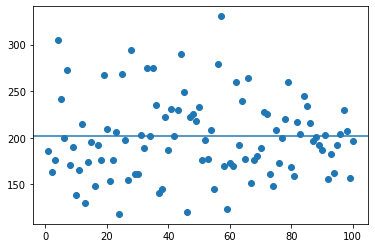

In [15]:
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means = []

for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state = i)
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state = i)
    sample_over_23 = over_23['PTS'].sample(7, random_state = i)
    
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    proportional_sampling_means.append(final_sample.mean())
    
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

We stratified the data by the number of games played, but this isn't a good approach. A player is considered as having played one game even if she only played for one or two minutes. But others play 30 or 40 minutes, and they're still considered as having played one game.

It makes more sense to stratify the data by number of minutes played, rather than by number of games played. The minutes played are a much better indicator of how much a player scored in a season than the number of games played.

In [21]:
wnba['MIN'].value_counts(bins = 3, normalize = True)*100

(347.333, 682.667]    34.965035
(10.993, 347.333]     33.566434
(682.667, 1018.0]     31.468531
Name: MIN, dtype: float64

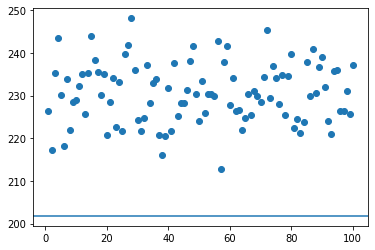

In [22]:
under_347=wnba[wnba['MIN']<347]
btw_347_682=wnba[(wnba['MIN'] > 347) & (wnba['Games Played'] <= 682)]
over_682 = wnba[wnba['MIN'] > 682]

proportional_means=[]

for i in range(100):
    sample_under_347 = under_347['PTS'].sample(34, random_state = i)
    sample_btw_347_682 = btw_347_682['PTS'].sample(35,
                                        random_state = i)
    sample_over_682 = over_682['PTS'].sample(31, random_state = i)
    final_sample = pd.concat([sample_under_347, sample_btw_347_682,
                              sample_over_682])
    proportional_means.append(final_sample.mean())
    
plt.scatter(range(1,101),proportional_means)
plt.axhline(wnba['PTS'].mean())

## Clusters

The data set we've been working with was scraped from the WNBA's website. The website centralizes data on basketball games and players in WNBA. Let's suppose for a moment that such a site didn't exist, and the data were instead scattered across each individual team's website. There are twelve unique teams in our data set, which means we'd have to scrape twelve different websites, each requiring its own scraping script.

This scenario is quite common in the data science workflow: you want to answer some questions about a population, but the data is scattered in such a way that data collection is either time-consuming or close to impossible. For instance, let's say you want to analyze how people review and rate movies as a function of movie budget. There are a lot of websites out there that can help with data collection, but how can you go about it so that you can spend one day or two on getting the data you need, rather than one month or two?

One way is to list all the data sources you can find, and then randomly pick only a few of them to collect data from. Then you can sample individually each of the sources you've randomly picked. This sampling method is called cluster sampling, and each of the individual data sources is called a cluster.

In [24]:
print(wnba['Team'].unique())

['DAL' 'LA' 'CON' 'SAN' 'MIN' 'SEA' 'PHO' 'CHI' 'WAS' 'NY' 'ATL' 'IND']


Then we need to find a way to pick randomly a few clusters from our listing. There are many ways to do that, but the important thing to keep in mind is that we should avoid picking a cluster twice. Here's one way to sample four clusters randomly:

Once we pick the clusters, we move to collecting the data. We can collect all the data from each cluster, but we can also perform sampling on each. It's actually possible to use different sampling methods for different clusters. For instance, we can use stratified sampling on the first two clusters, and simple random sampling on the other two.

In [23]:
clusters=pd.Series(wnba['Team'].unique()).sample(4,random_state=0)

sample=pd.DataFrame()

for cluster in clusters:
    data_collected=wnba[wnba['Team']==cluster]
    sample=sample.append(data_collected)
   
sampling_error_height = wnba['Height'].mean()-sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()

COMMON USE OF SAMPLING:

Instead of working with more than 10 million rows at each step of your analysis, you can save a lot of code running time by sampling several hundred rows, and perform your analysis on the sample. You can do a simple random sampling, but if you're interested in some categories beforehand, it might be a good idea to use stratified sampling.

Let's consider a different situation. It could be that you need to collect data from an API that either has a usage limit, or is not free. In this case, you are more or less forced to sample. Knowing how and what to sample can be of great use.

Another common use case of sampling is when the data is scattered across different locations (different websites, different databases, different companies, etc.). As we've discussed in the previous screen, cluster sampling would be a great choice in such a scenario.

When we describe a sample or a population (by measuring averages, proportions, and other metrics; by visualizing properties of the data through graphs; etc.), we do descriptive statistics.

When we try to use a sample to draw conclusions about a population, we do inferential statistics (we infer information from the sample about the population).